In [1]:
import pennylane as qml
import pandas as pd
from qco_level_0 import *
from qco_level_1 import optimization_level_1_df
from qco_spec_table import show_circuit
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
[ds] = qml.data.load("ketgpt")

In [3]:
# example
seed = 3
@qml.qnode(qml.device('default.qubit'))
def circuit():
    for op in ds.circuits[seed]:
        if op.name == 'QubitUnitary':
            continue
        qml.apply(op)
    return qml.state()

qnode_q1, df = optimization_level_1_df(circuit)
df

,original,qiskit,penny,mine
gates,291,221,214,169
1q gates,198,138,128,76
2q gates,93,83,85,93
depth,92,84,69,74
gate types,6,7,7,6


In [4]:
dfs = []
for seed in range(len(ds.circuits)):
    @qml.qnode(qml.device('default.qubit'))
    def circuit():
        for op in ds.circuits[seed]:
            if op.name == 'QubitUnitary':
                continue
            qml.apply(op)
        return qml.state()
    obj = qml.specs(circuit)()['resources']
    try:
        qnode_q1, df = optimization_level_1_df(circuit)
        dfs.append(df)
    except:
        pass

c:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\autoray\autoray.py:81: RuntimeWarning: invalid value encountered in arccos
  return func(*args, **kwargs)
c:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\autoray\autoray.py:81: RuntimeWarning: invalid value encountered in arccos
  return func(*args, **kwargs)
c:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\autoray\autoray.py:81: RuntimeWarning: invalid value encountered in arccos
  return func(*args, **kwargs)
c:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\autoray\autoray.py:81: RuntimeWarning: invalid value encountered in arccos
  return func(*args, **kwargs)
c:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\autoray\autoray.py:81: RuntimeWarning: invalid value encountered in arccos
  return func(*args, **kwargs)
c:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\autoray\autoray.py:81: RuntimeWa

In [5]:
len(dfs)                                    

1000

In [6]:
dfs[0]

,original,qiskit,penny,mine
gates,141,131,40,62
1q gates,116,106,20,37
2q gates,25,25,19,25
depth,32,32,17,25
gate types,5,4,6,4


In [7]:
dfs_copy = dfs.copy()
dfs_ratio = []
for idx, df in enumerate(dfs_copy):
    df = df.rename(columns={'qiskit':'Qiskit', 'penny':'PennyLane', 'mine':'Level 1+2+1'})
    dfs_ratio.append(df.div(df['original'], axis=0).round(3))
dfs_ratio = [df.drop(columns='original') for df in dfs_ratio]
dfs_ratio[0]

,Qiskit,PennyLane,Level 1+2+1
gates,0.929,0.284,0.440
1q gates,0.914,0.172,0.319
2q gates,1.000,0.760,1.000
depth,1.000,0.531,0.781
gate types,0.800,1.200,0.800


In [ ]:
records = []
for df in dfs_ratio:
    for metric in df.index:
        for method in df.columns:
            records.append({
                'metric': metric,
                'method': method,
                'ratio': df.loc[metric, method]
            })

long_df = pd.DataFrame(records)

In [15]:
dfs_ratio = [df.drop(columns='PennyLane') for df in dfs_ratio]

records = []
for df in dfs_ratio:
    for metric in df.index:
        for method in df.columns:
            records.append({
                'metric': metric,
                'method': method,
                'ratio': df.loc[metric, method]
            })

long_df = pd.DataFrame(records)

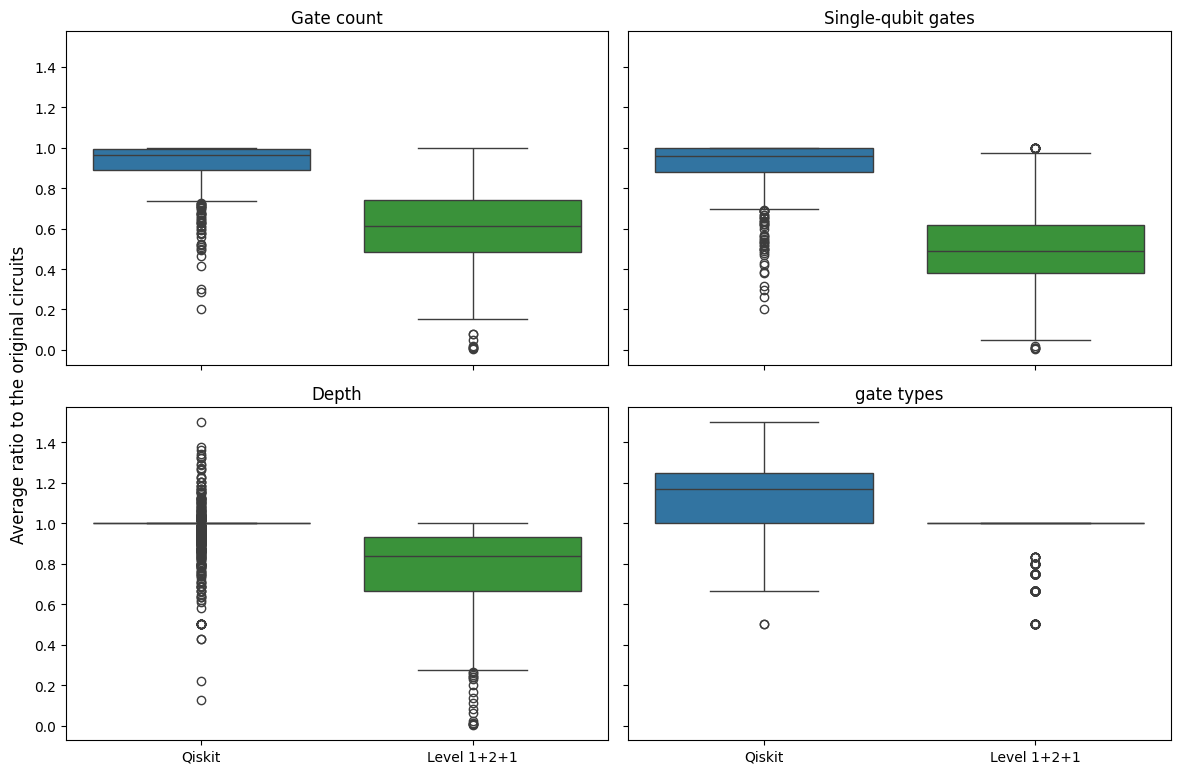

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

for i, metric in enumerate(['gates', '1q gates', 'depth', 'gate types']):
    ax = axes.flatten()[i]
    subset = long_df[long_df['metric'] == metric]
    sns.boxplot(data=subset, y='ratio', x='method', hue='method', ax=ax, palette={'Qiskit': '#1f77b4', 'PennyLane': '#ff7f0e', 'Level 1+2+1': '#2ca02c'})
    if i==0:
        ax.set_title('Gate count')
    elif i==1:
        ax.set_title('Single-qubit gates')
    elif i==2:
        ax.set_title('Depth')
    elif i==3:
        ax.set_title('gate types')
    # ax.set_ylim(-0.1, 1.6)
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('')  # Remove y-axis label

# fig.legend(handles, labels, loc='upper center', ncol=3, title='Method')
fig.supylabel('Average ratio to the original circuits')
fig.supxlabel('')
plt.tight_layout()
plt.show()

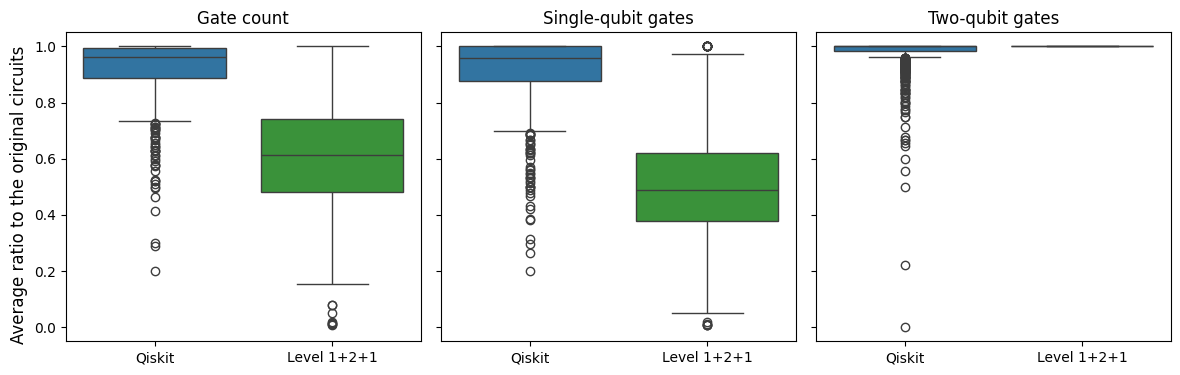

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)

for i, metric in enumerate(['gates', '1q gates', '2q gates']):
    ax = axes.flatten()[i]
    subset = long_df[long_df['metric'] == metric]
    sns.boxplot(data=subset, y='ratio', x='method', hue='method', ax=ax, palette={'Qiskit': '#1f77b4', 'PennyLane': '#ff7f0e', 'Level 1+2+1': '#2ca02c'})
    if i==0:
        ax.set_title('Gate count')
    elif i==1:
        ax.set_title('Single-qubit gates')
    elif i==2:
        ax.set_title('Two-qubit gates')
    # ax.set_ylim(-0.1, 1.6)
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('')  # Remove y-axis label

# fig.legend(handles, labels, loc='upper center', ncol=3, title='Method')
fig.supylabel('Average ratio to the original circuits')
fig.supxlabel('')
plt.tight_layout()
plt.show()

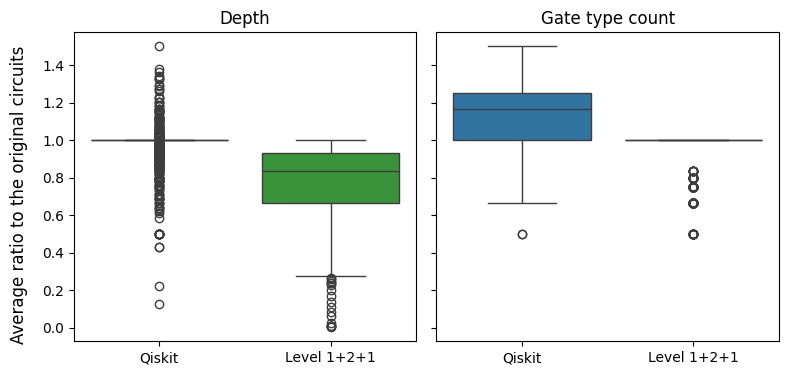

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

for i, metric in enumerate(['depth', 'gate types']):
    ax = axes.flatten()[i]
    subset = long_df[long_df['metric'] == metric]
    sns.boxplot(data=subset, y='ratio', x='method', hue='method', ax=ax, palette={'Qiskit': '#1f77b4', 'PennyLane': '#ff7f0e', 'Level 1+2+1': '#2ca02c'})
    if i==0:
        ax.set_title('Depth')
    elif i==1:
        ax.set_title('Gate type count')
    # ax.set_ylim(-0.1, 1.6)
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('')  # Remove y-axis label

# fig.legend(handles, labels, loc='upper center', ncol=3, title='Method')
fig.supylabel('Average ratio to the original circuits')
fig.supxlabel('')
plt.tight_layout()
plt.show()

In [19]:
long_df.groupby(['method','metric'])['ratio'].agg(['mean']).reset_index()

,method,metric,mean
0,Level 1+2+1,1q gates,0.509862
1,Level 1+2+1,2q gates,1.000000
2,Level 1+2+1,depth,0.780292
3,Level 1+2+1,gate types,0.934758
4,Level 1+2+1,gates,0.610568
5,Qiskit,1q gates,0.915943
6,Qiskit,2q gates,0.978090
7,Qiskit,depth,0.977242
8,Qiskit,gate types,1.123608
9,Qiskit,gates,0.924177


In [20]:
long_df.groupby(['method','metric'])['ratio'].agg(['std']).reset_index()

,method,metric,std
0,Level 1+2+1,1q gates,0.191355
1,Level 1+2+1,2q gates,0.000000
2,Level 1+2+1,depth,0.200962
3,Level 1+2+1,gate types,0.131422
4,Level 1+2+1,gates,0.189439
5,Qiskit,1q gates,0.111365
6,Qiskit,2q gates,0.065611
7,Qiskit,depth,0.108676
8,Qiskit,gate types,0.151532
9,Qiskit,gates,0.099506


In [21]:
min_df = long_df.groupby(['method','metric'])['ratio'].agg(['mean']).reset_index()
min_df['mean'] = (1-min_df['mean'])*100
min_df

,method,metric,mean
0,Level 1+2+1,1q gates,49.013800
1,Level 1+2+1,2q gates,0.000000
2,Level 1+2+1,depth,21.970800
3,Level 1+2+1,gate types,6.524200
4,Level 1+2+1,gates,38.943200
5,Qiskit,1q gates,8.405700
6,Qiskit,2q gates,2.191016
7,Qiskit,depth,2.275800
8,Qiskit,gate types,-12.360800
9,Qiskit,gates,7.582300
